In [90]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [91]:
sex_dum = pd.get_dummies(df_train['Sex'],drop_first=True)
df_using = pd.concat((df_train, sex_dum), axis = 1)
df_using = df_using.drop('Sex',axis = 1)

In [92]:
emb_dum = pd.get_dummies(df_orig['Embarked'],drop_first=True)
df_using = pd.concat((df_using, emb_dum), axis = 1)
df_using = df_using.drop('Embarked',axis = 1)

In [93]:
df_using.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
male             0
Q                0
S                0
dtype: int64

In [94]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [95]:
df_tmp = df_using.dropna()
df_tmp = df_tmp.drop('PassengerId',axis = 1)
df_tmp = df_tmp.drop('Name',axis = 1)
df_tmp = df_tmp.drop('Ticket',axis = 1)
df_tmp = df_tmp.drop('Cabin',axis = 1)
df_tmp.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
Survived,1.000000,-0.037227,-0.244604,0.100339,0.018723,0.134019,-0.535727,-0.039232,-0.104544
Pclass,-0.037227,1.000000,-0.307590,-0.100324,0.049894,-0.315069,-0.041725,-0.038676,0.241617
Age,-0.244604,-0.307590,1.000000,-0.161625,-0.274813,-0.091542,0.172307,0.017855,-0.099916
SibSp,0.100339,-0.100324,-0.161625,1.000000,0.258993,0.285492,-0.095344,0.169778,0.029704
Parch,0.018723,0.049894,-0.274813,0.258993,1.000000,0.388783,-0.081832,-0.065543,0.096096
Fare,0.134019,-0.315069,-0.091542,0.285492,0.388783,1.000000,-0.129871,0.015604,-0.240180
male,-0.535727,-0.041725,0.172307,-0.095344,-0.081832,-0.129871,1.000000,-0.002826,0.076760
Q,-0.039232,-0.038676,0.017855,0.169778,-0.065543,0.015604,-0.002826,1.000000,-0.135548
S,-0.104544,0.241617,-0.099916,0.029704,0.096096,-0.240180,0.076760,-0.135548,1.000000


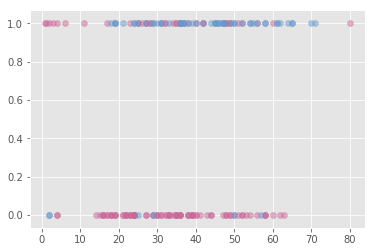

In [96]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df_draw = df_tmp[df_tmp.Survived==1]
df_age = df_draw.iloc[:,2]
df_sex = df_draw.iloc[:,6]
plt.scatter(df_age,df_sex, color='#cc6699',alpha=0.5)

df_draw = df_tmp[df_tmp.Survived==0]
df_age = df_draw.iloc[:,2]
df_sex = df_draw.iloc[:,6]
plt.scatter(df_age,df_sex, color='#6699cc',alpha=0.5)

plt.show()



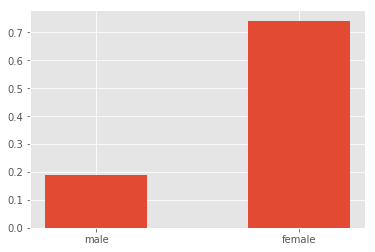

In [97]:
male_survived_ratio = len(df_train[(df_train.Sex == 'male') & (df_train.Survived == 1)]) / len(df_train[df_train.Sex == 'male'])
female_survived_ratio = len(df_train[(df_train.Sex == 'female') & (df_train.Survived == 1)]) / len(df_train[df_train.Sex == 'female'])
sex_survived_ratio = [male_survived_ratio, female_survived_ratio]
plt.bar([0,1], sex_survived_ratio, tick_label=['male', 'female'], width=0.5)
plt.show()

[0.6071428571428571, 0.1282051282051282, 0.16296296296296298, 0.2222222222222222, 0.18867924528301888, 0.14285714285714285, 0.13333333333333333, 0.0, 1.0] [0.7307692307692307, 0.7105263157894737, 0.7230769230769231, 0.8518518518518519, 0.6666666666666666, 0.8888888888888888, 1.0, 0.5, 0.5]


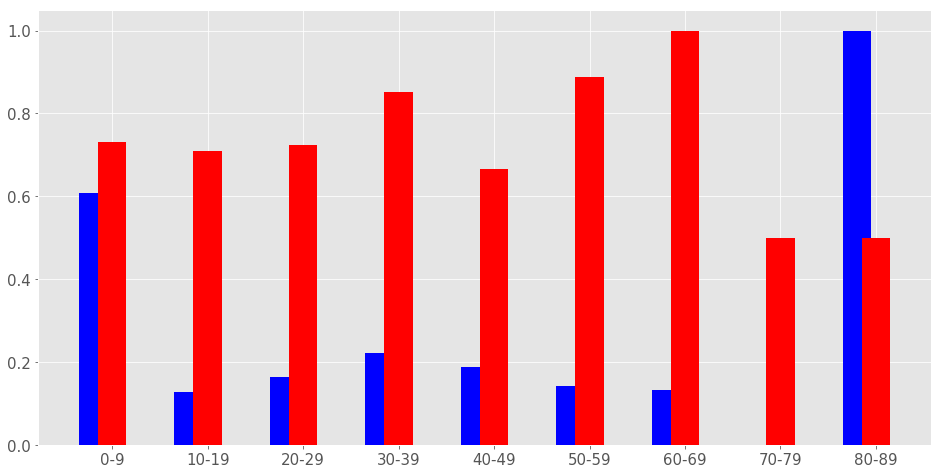

In [98]:
male_df = df_train[df_train.Sex == 'male']
female_df = df_train[df_train.Sex == 'female']

male_age_survived_ratio_list = []
female_age_survived_ratio_list = []
for i in range(0, int(max(df_train.Age))+1, 10):
    male_df_of_age = male_df[(male_df.Age >= i) & (male_df.Age < i+9)]
    female_df_of_age = female_df[(female_df.Age >= i) & (female_df.Age < i+9)]

    male_s = len(male_df_of_age[male_df_of_age.Survived == 1])
    female_s = len(female_df_of_age[female_df_of_age.Survived == 1])

    male_total = len(male_df_of_age)
    female_total = len(female_df_of_age)

    if male_total  == 0:
        male_age_survived_ratio_list.append(0.5)
    else:
        male_age_survived_ratio_list.append(male_s/male_total)

    if female_total == 0:
        female_age_survived_ratio_list.append(0.5)
    else:
        female_age_survived_ratio_list.append(female_s/female_total)

print(male_age_survived_ratio_list, female_age_survived_ratio_list)

x_labels = []
for i in range(0, int(max(df_train.Age))+1, 10):
    x_labels.append(str(i) + '-' + str(i+9))

plt.figure(figsize=(16,8))
x1 = [i for i in range(0, int(max(df_train.Age))+ 1, 10)]
x2 = [i + 2 for i in range(0, int(max(df_train.Age))+ 1, 10)]
plt.bar(x1, male_age_survived_ratio_list, tick_label=x_labels, width=3, color='blue')
plt.bar(x2,female_age_survived_ratio_list, tick_label=x_labels, width=3, color='red')
plt.tick_params(labelsize = 15)
plt.show()

In [99]:


l_names = [x.replace(",","").replace(".","").split(" ") for x in df_train.Name.values.tolist()]



In [100]:

def titleCheck(L):
        if 'Miss' in L: return 'Miss'
        elif 'Mrs' in L: return 'Mrs'
        elif 'Master' in L: return 'Master'
        elif 'Mr' in L: return 'Mr'
        else: return ""

l_title = [titleCheck(x) for x in l_names]
df_title = pd.Series(l_title, name = "Titles")
df_title.describe()

count     891
unique      5
top        Mr
freq      517
Name: Titles, dtype: object

In [101]:
l_family = [x[0] for x in l_names]
df_family = pd.Series(l_family, name = "Family")
df_family.describe()

count           891
unique          661
top       Andersson
freq              9
Name: Family, dtype: object

In [102]:
df_using = pd.concat((df_using, df_title), axis = 1)

title_dum = pd.get_dummies(df_using['Titles'],drop_first=True)
df_using = pd.concat((df_using, title_dum), axis = 1)
df_using = df_using.drop('Titles',axis = 1)

In [112]:
df_using = pd.concat((df_using, df_family), axis = 1)

df_using.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Youseff,Yousif,Yousseff,Yrois,Zabour,Zimmerman,de,del,van,Family
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,0,0,0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,Allen


In [109]:
n_oldest = df_using.Age.max()
n_oldest

80.0

In [110]:
df_using[df_using.Age==n_oldest]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Young,Youseff,Yousif,Yousseff,Yrois,Zabour,Zimmerman,de,del,van
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",80.0,0,0,27042,30.0,A23,...,0,0,0,0,0,0,0,0,0,0


In [136]:
a = df_using.Family == 'Johnson'
a.sum()

6

In [137]:
a = df_using.Family.value_counts()
b = a.index.tolist()
z = { x : a[x] for x in b}

x = df_using.Family
y = x.map(z)
x = pd.concat((x, y), axis = 1)
x.head(20)

,Family,Family
0,Braund,2
1,Cumings,1
2,Heikkinen,1
3,Futrelle,2
4,Allen,2
5,Moran,3
6,McCarthy,1
7,Palsson,4
8,Johnson,6
9,Nasser,2
